## Afwa Afini | PYTN-KS20-018

### Introduction
This task 3 implements an understanding of supervised machine learning in Python. The data to be used is the Bank Marketing Dataset taken from the UCI Machine Learning Repository. The data is related to a direct marketing campaign of a Portuguese banking institution. The marketing campaign for a term deposit subscription is based on phone calls.

There are four datasets:
1. bank-additional-full.csv
2. bank_additional.csv
3. bank-full.csv
4. bank.csv

<br>link dataset: https://archive.ics.uci.edu/dataset/222/bank+marketing

### Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix


In [74]:
# To hide the warning
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### Data Preprocessing & EDA

In [15]:
# load the data sources
bank_add_full = pd.read_csv('../dataset/bank-additional-full.csv', sep=';')
bank_add = pd.read_csv('../dataset/bank-additional.csv', sep=';')
bank = pd.read_csv('../dataset/bank.csv', sep=';')
bank_full = pd.read_csv('../dataset/bank-full.csv', sep=';')

In [13]:
print((bank_add_full.columns == bank_add.columns))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [23]:
print((bank_full.columns == bank.columns))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


In [8]:
# View the first 2 data
bank_add_full.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
# View the first 2 data
bank_add.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [18]:
bank_full.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [17]:
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [10]:
# check if there are similar records in these two datasets
common_attributes = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

is_common_data = bank_add_full[common_attributes].isin(bank_add[common_attributes]).all(axis=1)

if is_common_data.any():
    print("There is the same data in both datasets.")
else:
    print("No same data in both datasets.")

No same data in both datasets.


In [24]:
# check if there are similar records in these two datasets
common_attributes2 = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

is_common_data = bank_full[common_attributes2].isin(bank[common_attributes2]).all(axis=1)

if is_common_data.any():
    print("There is the same data in both datasets.")
else:
    print("No same data in both datasets.")

No same data in both datasets.


In [11]:
# Understanding the first dataset
print('dataframe shape : ', bank_add_full.shape)
print('check the missing values : ', bank_add_full.isna().values.any())
print(bank_add_full.info())

dataframe shape :  (41188, 21)
check the missing values :  False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.

In [12]:
# Understanding the second dataset
print('dataframe shape : ', bank_add.shape)
print('check the missing values : ', bank_add.isna().values.any())
print(bank_add.info())

dataframe shape :  (4119, 21)
check the missing values :  False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx

In [22]:
# Understanding the third dataset
print('dataframe shape : ', bank_full.shape)
print('check the missing values : ', bank_full.isna().values.any())
print(bank_full.info())

dataframe shape :  (45211, 17)
check the missing values :  False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [21]:
# Understanding the fourth dataset
print('dataframe shape : ', bank.shape)
print('check the missing values : ', bank.isna().values.any())
print(bank.info())

dataframe shape :  (4521, 17)
check the missing values :  False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [13]:
# View summary of first dataset
bank_add_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


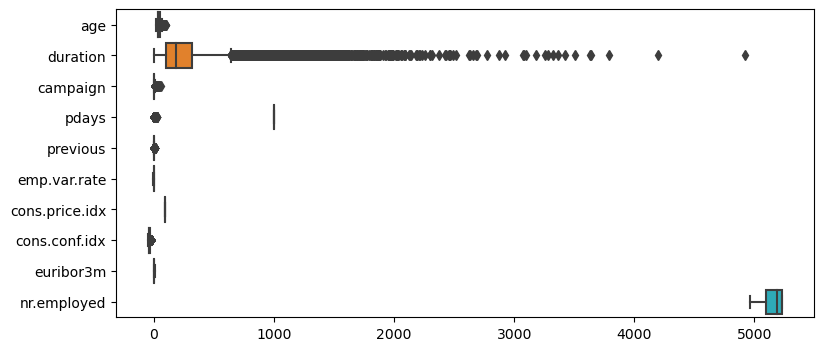

In [79]:
# Box plot to see the distribution of each feature's value
plt.figure(figsize=(9, 4))
sns.boxplot(data=bank_add_full, orient="h")
plt.show()

In [14]:
# View summary of second dataset
bank_add.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


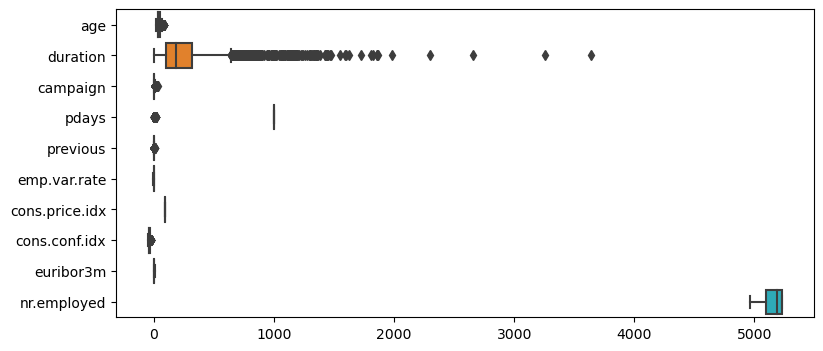

In [82]:
# Box plot to see the distribution of each feature's value
plt.figure(figsize=(9, 4))
sns.boxplot(data=bank_add, orient="h")
plt.show()

In [25]:
# View summary of third dataset
bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


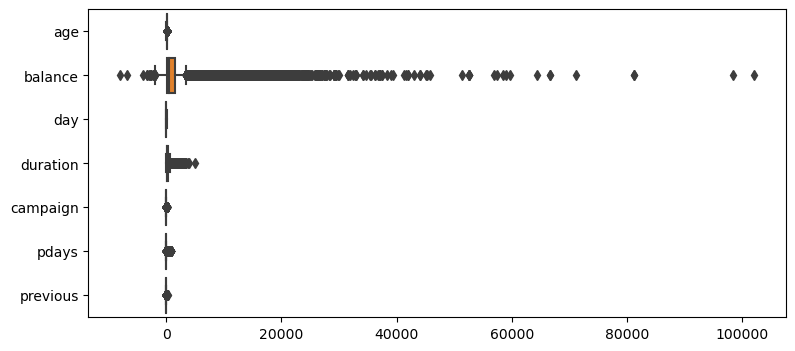

In [80]:
# Box plot to see the distribution of each feature's value
plt.figure(figsize=(9, 4))
sns.boxplot(data=bank_full, orient="h")
plt.show()

In [26]:
# View summary of fourth dataset
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


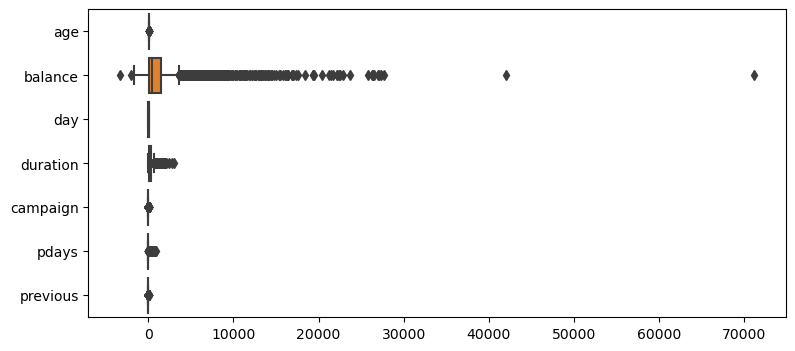

In [81]:
# Box plot to see the distribution of each feature's value
plt.figure(figsize=(9, 4))
sns.boxplot(data=bank, orient="h")
plt.show()

In [15]:
# View the unique categories of each columns (first and second datasets are considered the same)
print('bank_add_full shape : ', bank_add_full.shape)
for col in bank_add_full.select_dtypes('object').columns:
    if bank_add_full[col].nunique() <= 20:
        print(col, ':', bank_add_full[col].nunique(), bank_add_full[col].unique())
    else:
        print(col)

bank_add_full shape :  (41188, 21)
job : 12 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : 4 ['married' 'single' 'divorced' 'unknown']
education : 8 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : 3 ['no' 'unknown' 'yes']
housing : 3 ['no' 'yes' 'unknown']
loan : 3 ['no' 'yes' 'unknown']
contact : 2 ['telephone' 'cellular']
month : 10 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : 5 ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome : 3 ['nonexistent' 'failure' 'success']
y : 2 ['no' 'yes']


In [27]:
# View the unique categories of each columns (third and fourth datasets are considered the same)
print('bank_full shape : ', bank_full.shape)
for col in bank_full.select_dtypes('object').columns:
    if bank_full[col].nunique() <= 20:
        print(col, ':', bank_full[col].nunique(), bank_full[col].unique())
    else:
        print(col)

bank_full shape :  (45211, 17)
job : 12 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : 3 ['married' 'single' 'divorced']
education : 4 ['tertiary' 'secondary' 'unknown' 'primary']
default : 2 ['no' 'yes']
housing : 2 ['yes' 'no']
loan : 2 ['no' 'yes']
contact : 3 ['unknown' 'cellular' 'telephone']
month : 12 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : 4 ['unknown' 'failure' 'other' 'success']
y : 2 ['no' 'yes']


In [54]:
# Split manual the first dataset
X = bank_add_full.drop(['y'], axis=1) # only for inputs
y = bank_add_full.y.copy() # only for outputs

# Split manual the second dataset
A = bank_add.drop(['y'], axis=1) # only for inputs
b = bank_add.y.copy() # only for outputs 

# Split manual the third dataset
M = bank_full.drop(['y'], axis=1) # only for inputs
n = bank_full.y.copy() # only for outputs

# Split manual the fourth dataset
R = bank.drop(['y'], axis=1) # only for inputs
s = bank.y.copy() # only for outputs 

In [17]:
# View the splitting result of the first dataset
print(X.shape)
print(y.value_counts())

(41188, 20)
y
no     36548
yes     4640
Name: count, dtype: int64


In [18]:
# View the splitting result of the second dataset
print(A.shape)
print(b.value_counts())

(4119, 20)
y
no     3668
yes     451
Name: count, dtype: int64


In [30]:
# View the splitting result of the third dataset
print(M.shape)
print(n.value_counts())

(45211, 16)
y
no     39922
yes     5289
Name: count, dtype: int64


In [31]:
# View the splitting result of the fourth dataset
print(R.shape)
print(s.value_counts())

(4521, 16)
y
no     4000
yes     521
Name: count, dtype: int64


Converting the Inputs Variable to Numpy Array (2 dimensions) and Encoding the inputs

In [46]:
# Create a dictionary to store the 2D array result
array_num = {} # first dataset
additional_test = {} # second dataset
bank_full_arr = {} # third dataset
bank_arr = {} # fourth dataset

# List of feature names (numeric data type) that will be reshaped directly without encoding.
feature_num = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
feature_num2 = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# convert numeric features into 2D arrays (for first and second dataset)
for i in feature_num:
   array_num[i] = np.array(X[i]).reshape(-1,1)
   additional_test[i] = np.array(A[i]).reshape(-1,1)
   print(f'arrange {i}:', array_num[i][:1]) # just to check
   
# convert numeric features into 2D arrays (for third and fourth dataset)
print('==================')
for i in feature_num2:
   bank_full_arr[i] = np.array(M[i]).reshape(-1,1)
   bank_arr[i] = np.array(R[i]).reshape(-1,1)
   print(f'arrange {i}:', bank_full_arr[i][:1]) # just to check

arrange age: [[56]]
arrange duration: [[261]]
arrange campaign: [[1]]
arrange pdays: [[999]]
arrange previous: [[0]]
arrange emp.var.rate: [[1.1]]
arrange cons.price.idx: [[93.994]]
arrange cons.conf.idx: [[-36.4]]
arrange euribor3m: [[4.857]]
arrange nr.employed: [[5191.]]
arrange age: [[58]]
arrange balance: [[2143]]
arrange day: [[5]]
arrange duration: [[261]]
arrange campaign: [[1]]
arrange pdays: [[-1]]
arrange previous: [[0]]


In [38]:
# Encode features of data object type
# Create a OneHotEncoder object
oh = OneHotEncoder()

# Create a dictionary to store one-hot encoding results
oh_features = {}
oh_additional_test = {}
oh_bank_full = {}
oh_bank = {}

# List of feature names (data object type) to be encoded
feature_names = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
feature_names2 = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Perform one-hot encoding for each feature in the bank_add_full dataset
for i in feature_names:
    feature_array = np.array(X[i]).reshape(-1, 1)
    one_hot_encoded_feature = oh.fit_transform(feature_array).toarray()
    oh_features[i] = one_hot_encoded_feature
    print(f'{i}_oh : ', oh_features[i][:1]) # just to check
    
# Perform one-hot encoding for each feature in the bank_add dataset
for x in feature_names:
    feature_array = np.array(A[x]).reshape(-1, 1)
    one_hot_encoded_feature = oh.fit_transform(feature_array).toarray()
    oh_additional_test[x] = one_hot_encoded_feature
    
    
# Perform one-hot encoding for each feature in the bank_full dataset
print('==============')
for i in feature_names2:
    feature_array = np.array(M[i]).reshape(-1, 1)
    one_hot_encoded_feature = oh.fit_transform(feature_array).toarray()
    oh_bank_full[i] = one_hot_encoded_feature
    print(f'{i}_oh : ', oh_bank_full[i][:1]) # just to check
    
# Perform one-hot encoding for each feature in the bank dataset
for x in feature_names2:
    feature_array = np.array(R[x]).reshape(-1, 1)
    one_hot_encoded_feature = oh.fit_transform(feature_array).toarray()
    oh_bank[x] = one_hot_encoded_feature

job_oh :  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
marital_oh :  [[0. 1. 0. 0.]]
education_oh :  [[1. 0. 0. 0. 0. 0. 0. 0.]]
default_oh :  [[1. 0. 0.]]
housing_oh :  [[1. 0. 0.]]
loan_oh :  [[1. 0. 0.]]
contact_oh :  [[0. 1.]]
month_oh :  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
day_of_week_oh :  [[0. 1. 0. 0. 0.]]
poutcome_oh :  [[0. 1. 0.]]
job_oh :  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
marital_oh :  [[0. 1. 0.]]
education_oh :  [[0. 0. 1. 0.]]
default_oh :  [[1. 0.]]
housing_oh :  [[0. 1.]]
loan_oh :  [[1. 0.]]
contact_oh :  [[0. 0. 1.]]
month_oh :  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
poutcome_oh :  [[0. 0. 0. 1.]]


In [21]:
""" 
Notes: OneHotEncoder - sort labels by alphabets
job >> admin | blue-collar | enterpreneur | housemaid | management | retired | self-employed | services | student | technician | unemployed | unknown
marital >> divoreced | married | single | unknown
education >> basic.4y | basic.6y | basic.9y | high.school | illiterate | professional.course | university.degree | unknown
default >> no | unknown | yes
loan >> no | unknown | yes
contact >> cellular | telephone
day_of_week >> fri | mon | thu | tue | wed
"""

' \nNotes: OneHotEncoder - sort labels by alphabets\njob >> admin | blue-collar | enterpreneur | housemaid | management | retired | self-employed | services | student | technician | unemployed | unknown\nmarital >> divoreced | married | single | unknown\neducation >> basic.4y | basic.6y | basic.9y | high.school | illiterate | professional.course | university.degree | unknown\ndefault >> no | unknown | yes\nloan >> no | unknown | yes\ncontact >> cellular | telephone\nday_of_week >> fri | mon | thu | tue | wed\n'

Concatenate array 2 dimensions of the input labels

In [50]:
# List of features that will be concat
feature_num = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
feature_names = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
feature_num2 = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
feature_names2 = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create an empty array to hold the concat result
arrays_to_concat = []
add_arrays_concat = []
bank_full_concat = []
bank_concat = []

# Perform concat using the for loop simultaneously for two datasets (first and second dataset)
for m, n in zip(feature_num, feature_names):
    arrays_to_concat.append(array_num[m])
    arrays_to_concat.append(oh_features[n])
    add_arrays_concat.append(additional_test[m])
    add_arrays_concat.append(oh_additional_test[n])
    
# Perform concat using the for loop simultaneously for two datasets (third and fourth dataset)
# Concatenate numerical features
bank_full_concat.append(np.concatenate([bank_full_arr[m] for m in feature_num2], axis=1))
bank_concat.append(np.concatenate([bank_arr[m] for m in feature_num2], axis=1))
# Concatenate one-hot encoded features
bank_full_concat.append(np.concatenate([oh_bank_full[n] for n in feature_names2], axis=1))
bank_concat.append(np.concatenate([oh_bank[n] for n in feature_names2], axis=1))

# Stores the result of the for loop in a new variable
X_encoded_array = np.concatenate(arrays_to_concat, axis=1)
A_encoded = np.concatenate(add_arrays_concat, axis=1)
M_encoded_array = np.concatenate(bank_full_concat, axis=1)
R_encoded = np.concatenate(bank_concat, axis=1)
M_encoded_array[0] # just to check

array([ 5.800e+01,  2.143e+03,  5.000e+00,  2.610e+02,  1.000e+00,
       -1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
        0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
        1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        1.000e+00])

In [51]:
# just to check
# so, after encode the features there are 63 columns in each row/record train for first and second dataset
# and there are 35 columns in each row/record train for third and fourth dataset
print(X_encoded_array.shape) 
print(A_encoded.shape)
print(M_encoded_array.shape)
print(R_encoded.shape)

(41188, 63)
(4119, 63)
(45211, 51)
(4521, 51)


Encoding The Output/Target Data Columns<br><br>
> Output/Target Variable does not need to be converted to a 2-dimensional array, just label encoded.

In [61]:
targets = [y, b, n, s]
for i in targets:
    [i] = np.array([i])

In [62]:
# Create a LabelEncoder object
le = LabelEncoder()

# Do the encode for y and b (target in first and second dataset)
y_encoded_array = le.fit_transform(y)
b_test = le.fit_transform(b)

# Doing the encode for n and s (target in third and fourth dataset)
n_encoded_array = le.fit_transform(n)
s_test = le.fit_transform(s)

# just to check
print(y_encoded_array.shape)
print(b_test.shape)
print(n_encoded_array.shape)
print(s_test.shape)

(41188,)
(4119,)
(45211,)
(4521,)


In [143]:
# just to check
print(y_encoded_array)
print(b_test)
print(n_encoded_array)
print(s_test)

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 1 0 0]
[0 0 0 ... 0 0 0]


split the first dataset into training set and test set to fit the model

In [64]:
# for fitting the model using the first dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded_array, y_encoded_array, test_size=0.3, random_state=101)

# for fitting the model using the third dataset
M_train, M_test, n_train, n_test = train_test_split(M_encoded_array, n_encoded_array, test_size=0.3, random_state=101)

### Creating a machine learning model

#### 1. Logistic Regression

> First and Second Dataset

In [27]:
# Create a Logistic Regression model
model_lr = LogisticRegression(random_state=42)

# Train the model using the training sets
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [28]:
# Print the coefficient and intercept of the logistic regression model
print(model_lr.coef_) 
print(model_lr.intercept_)

[[ 3.60792721e-03  1.26111278e-02 -2.30079297e-02 -2.66942302e-03
  -8.88331080e-04  2.40983464e-04  1.05892281e-02 -1.08170638e-03
  -5.98776474e-03  9.70536150e-03  2.10004932e-03  1.63360781e-03
  -5.71205350e-04  4.63138460e-03 -2.03748775e-03 -1.80668105e-02
   2.26398859e-02  1.38409990e-04 -7.21657774e-02 -4.87361278e-03
  -3.90335799e-03 -1.07322806e-02 -2.09754949e-03  1.96208459e-04
   9.62418470e-04  2.00031068e-02  3.11906475e-03 -1.45505863e-03
   3.16167340e-02 -2.89357338e-02 -7.00262776e-06  1.77224972e-02
  -2.15088872e-03 -4.60772328e-04  5.28565867e-03 -2.65016945e-01
   4.48403892e-03 -4.60772328e-04 -1.34926896e-03  2.01819742e-01
   4.43866469e-02 -4.17126493e-02  3.88454077e-02  1.19999293e-02
   5.02977905e-03  2.68299688e-03 -3.25615411e-03  3.79835268e-03
   1.40290607e-02 -4.30766457e-02 -5.32122957e-03  1.05536551e-02
   6.23425334e-03 -2.84387699e-01 -4.71764054e-04 -3.05077553e-03
   4.53721706e-06  3.74691414e-03  2.44508585e-03 -3.69760977e-03
   5.75943

In [29]:
# Predict the response for test set and print the confusion matrix
pred_lr = model_lr.predict(X_test)
acc_score_lr = accuracy_score(y_test, pred_lr)
print('First Dataset :', acc_score_lr)
print(confusion_matrix(y_test, pred_lr))

# Predict the response test set and print the confusion matrix
pred_lr2 = model_lr.predict(A_encoded)
acc_score_lr2 = accuracy_score(b_test, pred_lr2)
print('Second Dataset', acc_score_lr2)
print(confusion_matrix(b_test, pred_lr2))

First Dataset : 0.9095249656065388
[[10725   253]
 [  865   514]]
Second Dataset 0.9147851420247632
[[3581   87]
 [ 264  187]]


In [30]:
# Print the classification report of the first dataset
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10978
           1       0.67      0.37      0.48      1379

    accuracy                           0.91     12357
   macro avg       0.80      0.67      0.71     12357
weighted avg       0.90      0.91      0.90     12357



In [31]:
# Print the classification report of the second dataset
print(classification_report(b_test, pred_lr2))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3668
           1       0.68      0.41      0.52       451

    accuracy                           0.91      4119
   macro avg       0.81      0.70      0.73      4119
weighted avg       0.90      0.91      0.91      4119



> Third and Fourth Dataset

In [112]:
# Because this third dataset has outliers so standardization must be done using the StandardScaler function.
# Create a StandardScaler model
scaler = StandardScaler()

# Transform data to model
M_train_scaled = scaler.fit_transform(M_train)
M_test_scaled = scaler.transform(M_test)

# Applied standardization to the new test data for the second prediction so that the scale of the data applied to the model is consistent
R_scaled = scaler.transform(R_encoded) 

In [86]:
# Create a Logistic Regression model
model_lr2 = LogisticRegression(random_state=69)

# Train the model using the training sets
model_lr2.fit(M_train_scaled, n_train)

LogisticRegression(random_state=69)

In [105]:
# Print the coefficient and intercept of the logistic regression model
print(model_lr2.coef_) 
print(model_lr2.intercept_)

[[ 0.0032551   0.03650756  0.10272123  1.05396269 -0.27449624  0.01422475
   0.0219522   0.0483112  -0.05300241 -0.02659255 -0.07218584  0.00843068
   0.09766473 -0.00565689 -0.0159416   0.0687827  -0.00787248 -0.01067498
  -0.0169294   0.00540775 -0.0585399   0.05983305 -0.07797841 -0.0168632
   0.07784045  0.00470416  0.0034317  -0.0034317   0.1751771  -0.1751771
   0.06702494 -0.06702494  0.33427788  0.13028375 -0.42437635  0.09270358
  -0.1083375   0.06584536  0.05421125 -0.15722166 -0.16430985  0.26199367
   0.20257951 -0.02074665 -0.15206974  0.14269623  0.11882345 -0.05765438
  -0.00574495  0.36796401 -0.11792354]]
[-2.83124772]


In [122]:
# Predict the response for test set and print the confusion matrix
pred_lr_ = model_lr2.predict(M_test_scaled)
acc_score_lr_ = accuracy_score(n_test, pred_lr_)
print('Third Dataset :', acc_score_lr_)
print(confusion_matrix(n_test, pred_lr_))

# Predict the response test set and print the confusion matrix
pred_lr_2 = model_lr2.predict(R_scaled)
acc_score_lr_2 = accuracy_score(s_test, pred_lr_2)
print('Fourth Dataset', acc_score_lr_2)
print(confusion_matrix(s_test, pred_lr_2))

Third Dataset : 0.9050427602477146
[[11691   276]
 [ 1012   585]]
Fourth Dataset 0.9013492590134926
[[3905   95]
 [ 351  170]]


In [107]:
# Print the classification report of the third dataset
print(classification_report(n_test, pred_lr_))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11967
           1       0.68      0.37      0.48      1597

    accuracy                           0.91     13564
   macro avg       0.80      0.67      0.71     13564
weighted avg       0.89      0.91      0.89     13564



In [114]:
# Print the classification report of the fourth dataset
print(classification_report(s_test, pred_lr_2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4000
           1       0.64      0.33      0.43       521

    accuracy                           0.90      4521
   macro avg       0.78      0.65      0.69      4521
weighted avg       0.89      0.90      0.89      4521



#### 2. K-Nearest Neighbor

> First and Second Dataset

In [32]:
error = []

# Calculating error for K values between 1 and 21
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

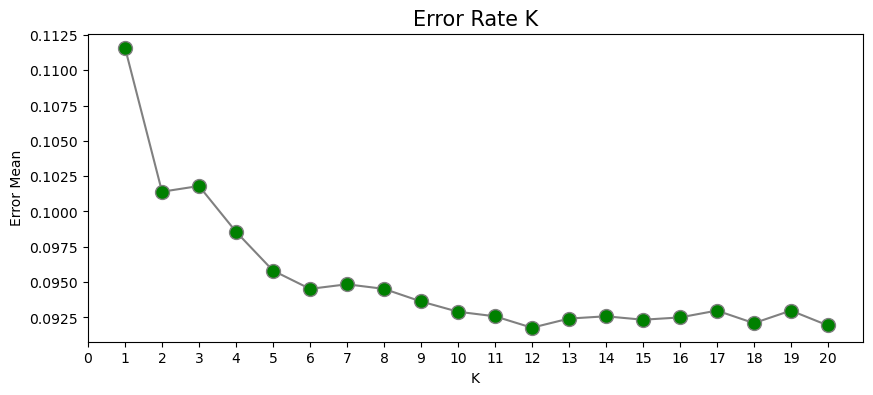

In [33]:
# Visualize the error results
plt.figure(figsize=(10,4))
plt.plot(range(1,21), error, color='grey', linestyle='-', marker='o',
         markerfacecolor='green', markersize=10)
plt.xticks(np.arange(0,21))
plt.title('Error Rate K', fontsize=15)
plt.xlabel('K')
plt.ylabel('Error Mean')
plt.show()

It can be seen that K = 12 has the lowest error mean value. So, K = 12 was chosen for knn modeling this time.

In [53]:
# Create a KNN Classifier model
knn = KNeighborsClassifier(n_neighbors=12)

# Train the model using training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset and print the confusion matrix
pred_knn = knn.predict(X_test)
acc_score_knn = accuracy_score(y_test, pred_knn)
print('First Dataset :', acc_score_knn)
print(confusion_matrix(y_test, pred_knn))

# Predict the response for test dataset and print the confusion matrix
pred_knn2 = knn.predict(A_encoded)
acc_score_knn2 = accuracy_score(b_test, pred_knn2)
print('Second Dataset', acc_score_knn2)
print(confusion_matrix(b_test, pred_knn2))

First Dataset : 0.9082301529497451
[[10621   357]
 [  777   602]]
Second Dataset 0.9230395727118232
[[3571   97]
 [ 220  231]]


In [35]:
# Print the classification report of the first dataset
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10978
           1       0.63      0.44      0.51      1379

    accuracy                           0.91     12357
   macro avg       0.78      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [36]:
# Print the classification report of the second dataset
print(classification_report(b_test, pred_knn2))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3668
           1       0.70      0.51      0.59       451

    accuracy                           0.92      4119
   macro avg       0.82      0.74      0.78      4119
weighted avg       0.92      0.92      0.92      4119



> Third and Fourth Dataset

In [110]:
error2 = []

# Calculating error for K values between 1 and 21
for i in range(1,21):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(M_train_scaled, n_train)
    pred_i = knn2.predict(M_test_scaled)
    error2.append(np.mean(pred_i != n_test))

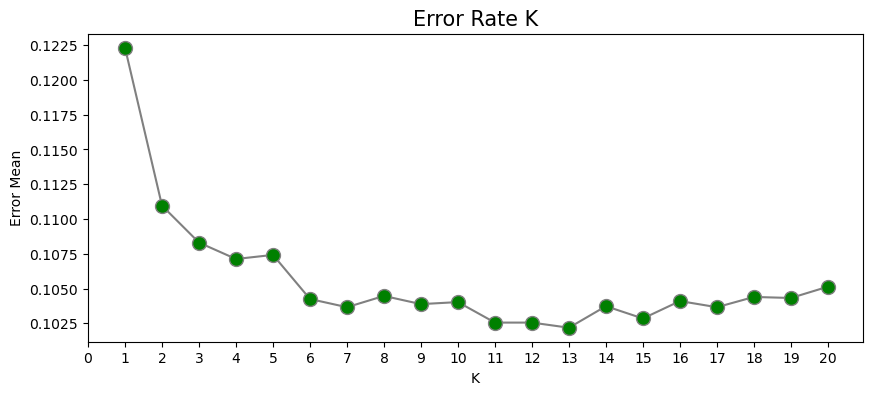

In [111]:
# Visualize the error results
plt.figure(figsize=(10,4))
plt.plot(range(1,21), error2, color='grey', linestyle='-', marker='o',
         markerfacecolor='green', markersize=10)
plt.xticks(np.arange(0,21))
plt.title('Error Rate K', fontsize=15)
plt.xlabel('K')
plt.ylabel('Error Mean')
plt.show()

It can be seen that K = 13 has the lowest error mean value. So, K = 13 was chosen for knn modeling this time.

In [115]:
# Create a KNN Classifier model
knn2 = KNeighborsClassifier(n_neighbors=13)

# Train the model using training sets
knn2.fit(M_train_scaled, n_train)

# Predict the response for test dataset and print the confusion matrix
pred_knn_ = knn2.predict(M_test_scaled)
acc_score_knn_ = accuracy_score(n_test, pred_knn_)
print('Third Dataset :', acc_score_knn_)
print(confusion_matrix(n_test, pred_knn_))

# Predict the response for test dataset and print the confusion matrix
pred_knn_2 = knn2.predict(R_scaled)
acc_score_knn_2 = accuracy_score(s_test, pred_knn_2)
print('Second Dataset', acc_score_knn_2)
print(confusion_matrix(s_test, pred_knn_2))

Third Dataset : 0.897817752875258
[[11727   240]
 [ 1146   451]]
Second Dataset 0.9013492590134926
[[3939   61]
 [ 385  136]]


In [116]:
# Print the classification report of the third dataset
print(classification_report(n_test, pred_knn_))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11967
           1       0.65      0.28      0.39      1597

    accuracy                           0.90     13564
   macro avg       0.78      0.63      0.67     13564
weighted avg       0.88      0.90      0.88     13564



In [117]:
# Print the classification report of the fourth dataset
print(classification_report(s_test, pred_knn_2))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      4000
           1       0.69      0.26      0.38       521

    accuracy                           0.90      4521
   macro avg       0.80      0.62      0.66      4521
weighted avg       0.89      0.90      0.88      4521



#### 3. Support Vector Machine (SVM)

> First and Second Dataset

In [54]:
# Create a SVM model
SVM = svm.SVC()

# Train the model using the training sets
SVM.fit(X_train, y_train)

# Predict the response for test dataset and print the confusion matrix
pred_svm = SVM.predict(X_test)
acc_score_svm = accuracy_score(y_test, pred_svm)
print('First Dataset :', acc_score_svm)
print(confusion_matrix(y_test, pred_svm))

# Predict the response for test dataset and print the confusion matrix
pred_svm2 = SVM.predict(A_encoded)
acc_score_svm2 = accuracy_score(b_test, pred_svm2)
print('Second Dataset :', acc_score_svm2)
print(confusion_matrix(b_test, pred_svm2))

First Dataset : 0.9007849801731812
[[10831   147]
 [ 1079   300]]
Second Dataset : 0.9009468317552805
[[3607   61]
 [ 347  104]]


In [38]:
# Print the classification report of the first dataset
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10978
           1       0.67      0.22      0.33      1379

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357



In [39]:
# Print the classification report of the second dataset
print(classification_report(b_test, pred_svm2))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3668
           1       0.63      0.23      0.34       451

    accuracy                           0.90      4119
   macro avg       0.77      0.61      0.64      4119
weighted avg       0.88      0.90      0.88      4119



> Third and Fourth Dataset

In [119]:
# Create a SVM model
SVM2 = svm.SVC()

# Train the model using the training sets
SVM2.fit(M_train_scaled, n_train)

# Predict the response for test dataset and print the confusion matrix
pred_svm_ = SVM2.predict(M_test_scaled)
acc_score_svm_ = accuracy_score(n_test, pred_svm_)
print('Third Dataset :', acc_score_svm_)
print(confusion_matrix(n_test, pred_svm_))

# Predict the response for test dataset and print the confusion matrix
pred_svm_2 = SVM2.predict(R_scaled)
acc_score_svm_2 = accuracy_score(s_test, pred_svm_2)
print('Fourth Dataset :', acc_score_svm_2)
print(confusion_matrix(s_test, pred_svm_2))

Third Dataset : 0.9046741374225892
[[11722   245]
 [ 1048   549]]
Fourth Dataset : 0.915947799159478
[[3946   54]
 [ 326  195]]


In [120]:
# Print the classification report of the third dataset
print(classification_report(n_test, pred_svm_))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11967
           1       0.69      0.34      0.46      1597

    accuracy                           0.90     13564
   macro avg       0.80      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [127]:
# Print the classification report of the fourth dataset
print(classification_report(s_test, pred_svm_2))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4000
           1       0.78      0.37      0.51       521

    accuracy                           0.92      4521
   macro avg       0.85      0.68      0.73      4521
weighted avg       0.91      0.92      0.90      4521



#### 4. Decision Tree

> First and Second Dataset

In [125]:
# Create a Decision Tree Classifier model
dt = DecisionTreeClassifier()

# Train the model using training sets
dt.fit(X_train, y_train)

# Predict the response for test dataset and print the confusion matrix
pred_dt = dt.predict(X_test)
acc_score_dt = accuracy_score(y_test, pred_dt)
print('First Dataset :', acc_score_dt)
print(confusion_matrix(y_test, pred_dt))

# Predict the response for test dataset and print the confusion matrix
pred_dt2 = dt.predict(A_encoded)
acc_score_dt2 = accuracy_score(b_test, pred_dt2)
print('Second Dataset :', acc_score_dt2)
print(confusion_matrix(b_test, pred_dt2))

First Dataset : 0.8893744436351866
[[10235   743]
 [  624   755]]
Second Dataset : 0.9669822772517601
[[3589   79]
 [  57  394]]


In [41]:
# Print the classification report of the first dataset
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10978
           1       0.51      0.55      0.53      1379

    accuracy                           0.89     12357
   macro avg       0.73      0.74      0.73     12357
weighted avg       0.89      0.89      0.89     12357



In [126]:
# Print the classification report of the second dataset
print(classification_report(b_test, pred_dt2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3668
           1       0.83      0.87      0.85       451

    accuracy                           0.97      4119
   macro avg       0.91      0.93      0.92      4119
weighted avg       0.97      0.97      0.97      4119



> Third and Fourth Dataset

In [123]:
# Create a Decision Tree Classifier model
dt2 = DecisionTreeClassifier()

# Train the model using training sets
dt2.fit(M_train_scaled, n_train)

# Predict the response for test dataset and print the confusion matrix
pred_dt_ = dt2.predict(M_test_scaled)
acc_score_dt_ = accuracy_score(n_test, pred_dt_)
print('Third Dataset :', acc_score_dt_)
print(confusion_matrix(n_test, pred_dt_))

# Predict the response for test dataset and print the confusion matrix
pred_dt_2 = dt2.predict(R_scaled)
acc_score_dt_2 = accuracy_score(s_test, pred_dt_2)
print('Fourth Dataset :', acc_score_dt_2)
print(confusion_matrix(s_test, pred_dt_2))

Third Dataset : 0.8774697729283397
[[11124   843]
 [  819   778]]
Fourth Dataset : 0.9659367396593674
[[3916   84]
 [  70  451]]


In [129]:
# Print the classification report of the third dataset
print(classification_report(n_test, pred_dt_))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11967
           1       0.48      0.49      0.48      1597

    accuracy                           0.88     13564
   macro avg       0.71      0.71      0.71     13564
weighted avg       0.88      0.88      0.88     13564



In [128]:
# Print the classification report of the fourth dataset
print(classification_report(s_test, pred_dt_2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4000
           1       0.84      0.87      0.85       521

    accuracy                           0.97      4521
   macro avg       0.91      0.92      0.92      4521
weighted avg       0.97      0.97      0.97      4521



#### 5. Random Forest

> First and Second Dataset

In [56]:
# Create a Random Forest Classifier model
rf = RandomForestClassifier()

# Train the model using training sets
rf.fit(X_train, y_train)

# Predict the response for test dataset and print the confusion matrix
pred_rf = rf.predict(X_test)
acc_score_rf = accuracy_score(y_test, pred_rf)
print('First Dataset :', acc_score_rf)
print(confusion_matrix(y_test, pred_rf))

# Predict the response for test dataset and print the confusion matrix
pred_rf2 = rf.predict(A_encoded)
acc_score_rf2 = accuracy_score(b_test, pred_rf2)
print('Second Dataset :', acc_score_rf2)
print(confusion_matrix(b_test, pred_rf2))

First Dataset : 0.9114671845917294
[[10643   335]
 [  759   620]]
Second Dataset : 0.9764505948045642
[[3638   30]
 [  67  384]]


In [44]:
# Print the classification report of the first dataset
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10978
           1       0.64      0.45      0.53      1379

    accuracy                           0.91     12357
   macro avg       0.79      0.71      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [45]:
# Print the classification report of the second dataset
print(classification_report(b_test, pred_rf2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3668
           1       0.93      0.86      0.89       451

    accuracy                           0.98      4119
   macro avg       0.96      0.92      0.94      4119
weighted avg       0.98      0.98      0.98      4119



> Third and Fourth Dataset

In [131]:
# Create a Random Forest Classifier model
rf2 = RandomForestClassifier()

# Train the model using training sets
rf2.fit(M_train_scaled, n_train)

# Predict the response for test dataset and print the confusion matrix
pred_rf_ = rf2.predict(M_test_scaled)
acc_score_rf_ = accuracy_score(n_test, pred_rf_)
print('Third Dataset :', acc_score_rf_)
print(confusion_matrix(n_test, pred_rf_))

# Predict the response for test dataset and print the confusion matrix
pred_rf_2 = rf2.predict(R_scaled)
acc_score_rf_2 = accuracy_score(s_test, pred_rf_2)
print('Fourth Dataset :', acc_score_rf_2)
print(confusion_matrix(s_test, pred_rf_2))

Third Dataset : 0.9090976113240932
[[11664   303]
 [  930   667]]
Fourth Dataset : 0.9732360097323601
[[3972   28]
 [  93  428]]


In [132]:
# Print the classification report of the third dataset
print(classification_report(n_test, pred_rf_))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11967
           1       0.69      0.42      0.52      1597

    accuracy                           0.91     13564
   macro avg       0.81      0.70      0.73     13564
weighted avg       0.90      0.91      0.90     13564



In [133]:
# Print the classification report of the fourth dataset
print(classification_report(s_test, pred_rf_2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4000
           1       0.94      0.82      0.88       521

    accuracy                           0.97      4521
   macro avg       0.96      0.91      0.93      4521
weighted avg       0.97      0.97      0.97      4521



#### 6. Naive Bayes

> First and Second Dataset

In [58]:
# Create a Naive Bayes model
nb = GaussianNB()

# Train the model using training sets
nb.fit(X_train, y_train)

# Predict the response for test dataset and print the confusion matrix
pred_nb = nb.predict(X_test)
acc_score_nb = accuracy_score(y_test, pred_nb)
print('First Dataset :', acc_score_nb)
print(confusion_matrix(y_test, pred_nb))

# Predict the response for test dataset and print the confusion matrix
pred_nb2 = nb.predict(A_encoded)
acc_score_nb2 = accuracy_score(b_test, pred_nb2)
print('Second Dataset :', acc_score_nb2)
print(confusion_matrix(b_test, pred_nb2))

First Dataset : 0.8643683742008578
[[9991  987]
 [ 689  690]]
Second Dataset : 0.8652585579024035
[[3329  339]
 [ 216  235]]


In [47]:
# Print the classification report of the first dataset
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     10978
           1       0.41      0.50      0.45      1379

    accuracy                           0.86     12357
   macro avg       0.67      0.71      0.69     12357
weighted avg       0.88      0.86      0.87     12357



In [48]:
# Print the classification report of the second dataset
print(classification_report(b_test, pred_nb2))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3668
           1       0.41      0.52      0.46       451

    accuracy                           0.87      4119
   macro avg       0.67      0.71      0.69      4119
weighted avg       0.88      0.87      0.87      4119



> Third and Fourth Dataset

In [134]:
# Create a Naive Bayes model
nb2 = GaussianNB()

# Train the model using training sets
nb2.fit(M_train_scaled, n_train)

# Predict the response for test dataset and print the confusion matrix
pred_nb_ = nb2.predict(M_test_scaled)
acc_score_nb_ = accuracy_score(n_test, pred_nb_)
print('Third Dataset :', acc_score_nb_)
print(confusion_matrix(n_test, pred_nb_))

# Predict the response for test dataset and print the confusion matrix
pred_nb_2 = nb2.predict(R_scaled)
acc_score_nb_2 = accuracy_score(s_test, pred_nb_2)
print('Fourth Dataset :', acc_score_nb_2)
print(confusion_matrix(s_test, pred_nb_2))

Third Dataset : 0.8551312297257446
[[10768  1199]
 [  766   831]]
Fourth Dataset : 0.8489272284892723
[[3585  415]
 [ 268  253]]


In [135]:
# Print the classification report of the third dataset
print(classification_report(n_test, pred_nb_))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     11967
           1       0.41      0.52      0.46      1597

    accuracy                           0.86     13564
   macro avg       0.67      0.71      0.69     13564
weighted avg       0.87      0.86      0.86     13564



In [137]:
# Print the classification report of the second dataset
print(classification_report(s_test, pred_nb_2))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      4000
           1       0.38      0.49      0.43       521

    accuracy                           0.85      4521
   macro avg       0.65      0.69      0.67      4521
weighted avg       0.87      0.85      0.86      4521



### Plot the Accuracy Score to Compared

> First and Second Dataset

In [62]:
# Collect the accuracy scores from the predictions using the first dataset into a dictionary
acc_score_add_full = {'Logistic Regression':acc_score_lr, 
                       'KNN':acc_score_knn, 
                       'SVM':acc_score_svm, 
                       'DecisionTree':acc_score_dt, 
                       'Random Forest':acc_score_rf, 
                       'Gaussian':acc_score_nb
                       }
acc_score_add_full

{'Logistic Regression': 0.9095249656065388,
 'KNN': 0.9082301529497451,
 'SVM': 0.9007849801731812,
 'DecisionTree': 0.8913975884114267,
 'Random Forest': 0.9114671845917294,
 'Gaussian': 0.8643683742008578}

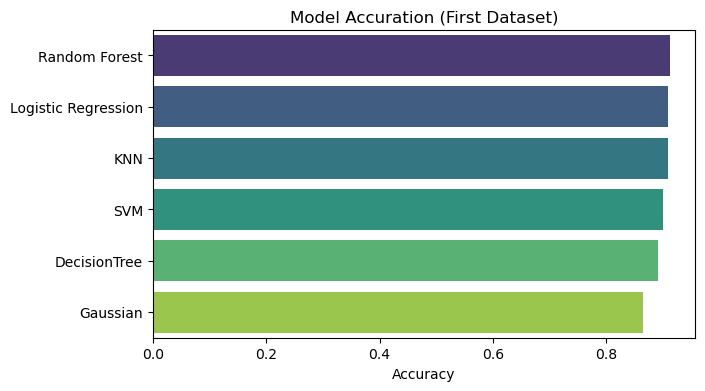

In [63]:
# Separate the model name and accuracy
model_names = list(acc_score_add_full.keys())
accuracy_scores = list(acc_score_add_full.values())

# Sort the models by accuracy (in descending order)
sorted_model_names = [x for _, x in sorted(zip(accuracy_scores, model_names), reverse=True)]
sorted_accuracy_scores = sorted(accuracy_scores, reverse=True)

# Create visualization of acc_score_add_full
plt.figure(figsize=(7, 4))
sns.barplot(x=sorted_accuracy_scores, y=sorted_model_names, palette="viridis")
plt.xlabel('Accuracy')
plt.title('Model Accuration (First Dataset)')
plt.show()

In [60]:
# Collect the accuracy scores from the predictions using the second dataset into a dictionary. 
acc_score_add = {'Logistic Regression':acc_score_lr2, 
                       'KNN':acc_score_knn2, 
                       'SVM':acc_score_svm2, 
                       'DecisionTree':acc_score_dt2, 
                       'Random Forest':acc_score_rf2, 
                       'Gaussian':acc_score_nb2
                       }
acc_score_add

{'Logistic Regression': 0.9147851420247632,
 'KNN': 0.9230395727118232,
 'SVM': 0.9009468317552805,
 'DecisionTree': 0.969895605729546,
 'Random Forest': 0.9764505948045642,
 'Gaussian': 0.8652585579024035}

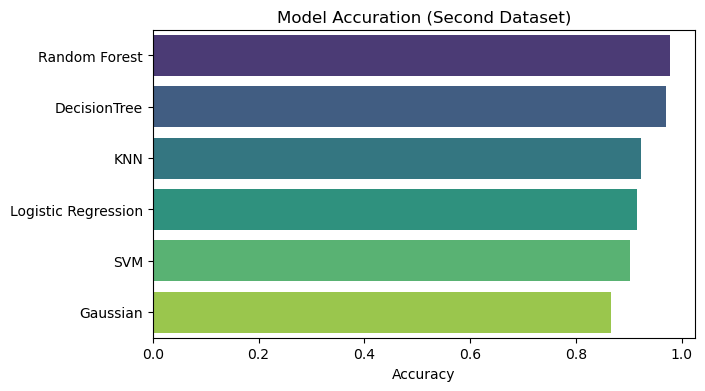

In [61]:
# Separate the model name and accuracy
model_names = list(acc_score_add.keys())
accuracy_scores = list(acc_score_add.values())

# Sort the models by accuracy (in descending order)
sorted_model_names = [x for _, x in sorted(zip(accuracy_scores, model_names), reverse=True)]
sorted_accuracy_scores = sorted(accuracy_scores, reverse=True)

# Create visualization of acc_score_add
plt.figure(figsize=(7, 4))
sns.barplot(x=sorted_accuracy_scores, y=sorted_model_names, palette="viridis")
plt.xlabel('Accuracy')
plt.title('Model Accuration (Second Dataset)')
plt.show()

> Third and Fourth Dataset

In [138]:
# Collect the accuracy scores from the predictions using the third dataset into a dictionary
acc_score_bank_full = {'Logistic Regression':acc_score_lr_, 
                       'KNN':acc_score_knn_, 
                       'SVM':acc_score_svm_, 
                       'DecisionTree':acc_score_dt_, 
                       'Random Forest':acc_score_rf_, 
                       'Gaussian':acc_score_nb_
                       }
acc_score_bank_full

{'Logistic Regression': 0.9050427602477146,
 'KNN': 0.897817752875258,
 'SVM': 0.9046741374225892,
 'DecisionTree': 0.8774697729283397,
 'Random Forest': 0.9090976113240932,
 'Gaussian': 0.8551312297257446}

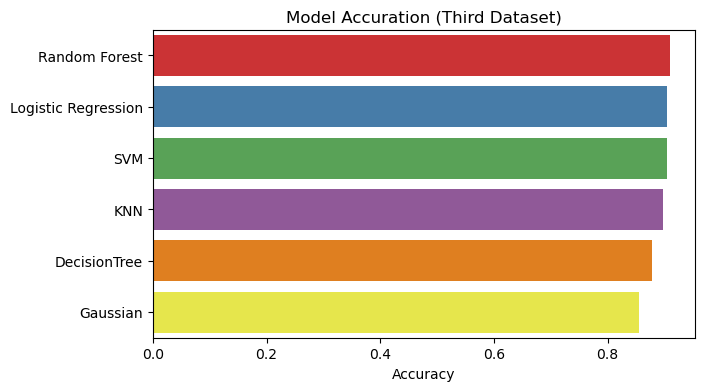

In [140]:
# Separate the model name and accuracy
model_names = list(acc_score_bank_full.keys())
accuracy_scores = list(acc_score_bank_full.values())

# Sort the models by accuracy (in descending order)
sorted_model_names = [x for _, x in sorted(zip(accuracy_scores, model_names), reverse=True)]
sorted_accuracy_scores = sorted(accuracy_scores, reverse=True)

# Create visualization of acc_score_add_full
plt.figure(figsize=(7, 4))
sns.barplot(x=sorted_accuracy_scores, y=sorted_model_names, palette="Set1")
plt.xlabel('Accuracy')
plt.title('Model Accuration (Third Dataset)')
plt.show()

In [141]:
# Collect the accuracy scores from the predictions using the second dataset into a dictionary. 
acc_score_bank = {'Logistic Regression':acc_score_lr_2, 
                       'KNN':acc_score_knn_2, 
                       'SVM':acc_score_svm_2, 
                       'DecisionTree':acc_score_dt_2, 
                       'Random Forest':acc_score_rf_2, 
                       'Gaussian':acc_score_nb_2
                       }
acc_score_bank

{'Logistic Regression': 0.9013492590134926,
 'KNN': 0.9013492590134926,
 'SVM': 0.915947799159478,
 'DecisionTree': 0.9659367396593674,
 'Random Forest': 0.9732360097323601,
 'Gaussian': 0.8489272284892723}

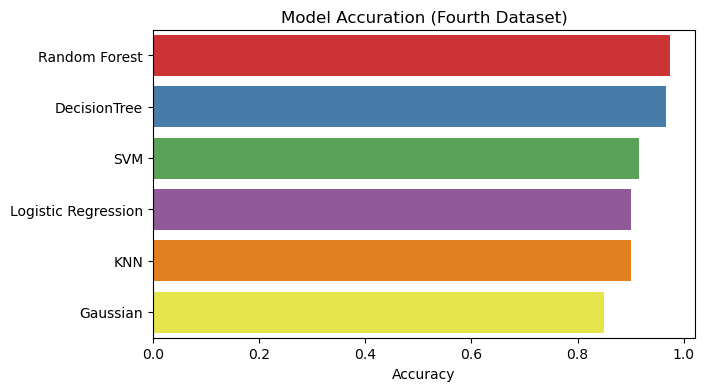

In [142]:
# Separate the model name and accuracy
model_names = list(acc_score_bank.keys())
accuracy_scores = list(acc_score_bank.values())

# Sort the models by accuracy (in descending order)
sorted_model_names = [x for _, x in sorted(zip(accuracy_scores, model_names), reverse=True)]
sorted_accuracy_scores = sorted(accuracy_scores, reverse=True)

# Create visualization of acc_score_add_full
plt.figure(figsize=(7, 4))
sns.barplot(x=sorted_accuracy_scores, y=sorted_model_names, palette="Set1")
plt.xlabel('Accuracy')
plt.title('Model Accuration (Fourth Dataset)')
plt.show()

### Conclusion: Algorithm Analysis

The choice of the best algorithm will largely depend on our context and goals. Each algorithm has its advantages and disadvantages, and its performance may very depending on the characteristics of the data used. 

In the comparison of the above accuracy results for the first-second and third-fourth datasets , it was decided to consider using the Random Forest algorithm to create a model. Here are general considerations:
> 1. The Random Forest model successfully performed well on both datasets. 
> 2. In the second and fourth dataset, the model was able to provide predictions with very high accuracy and maintain a balance between detecting positive and negative cases.

Keep in mind that there is no "one-size-fits-all" in model selection. Sometimes, even a combination of several models or data preprocessing techniques may be required to achieve the best results. Therefore, it is important to consider the objectives, data characteristics, and results from cross-validation and model evaluation throughly before making a final decision.

